In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing our DASS-42 dataset
data = pd.read_excel(r"Pdata.xlsx")
df = pd.DataFrame(data)
df.head

<bound method NDFrame.head of       Age  Gender  Q1  Q2  Q3  Q4  Q5  Q6  Q7 Q8  ...  Q34  Q35  Q36  Q37  \
0      24       1   1   1   1   1   1   0   0  0  ...    0    0    0    0   
1      26       1   1   0   0   1   1   2   2  1  ...    1    2    1    1   
2      22       1   1   2   3   1   0   2   0  1  ...    0    0    0    0   
3      24       0   1   1   2   1   2   1   0  1  ...    3    2    1    1   
4      22       1   1   2   0   2   1   0   0  1  ...    3    2    1    0   
...   ...     ...  ..  ..  ..  ..  ..  ..  .. ..  ...  ...  ...  ...  ...   
3995   22       1   0   3   1   0   0   1   0  0  ...    0    1    1    0   
3996   20       0   1   3   0   0   0   1   1  0  ...    0    1    0    0   
3997   22       0   1   1   2   1   2   0   0  1  ...    0    0    1    0   
3998   20       0   0   1   1   1   2   1   1  1  ...    2    1    0    0   
3999   21       0   1   1   0   0   1   1   1  2  ...    0    1    1    0   

      Q38  Q39  Q40  Q41  Q42  Unnamed: 44  


In [3]:
df.drop(columns=['Unnamed: 44'], inplace=True)

In [4]:
df. isnull().head(10)

,Age,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
others = df.iloc[:,0:2]
others.describe()
others.head()


,Age,Gender
0,24,1
1,26,1
2,22,1
3,24,0
4,22,1


In [6]:
depression_test = df.iloc[:,2:16]
depression_test.head()
depression_test["DEPRESSION SCORE"] = depression_test.sum(axis = 1)
depression_test.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q9,Q10,Q11,Q12,Q13,Q14,DEPRESSION SCORE
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,3996.000000,4000.000000,4000.000000,4000.00000,4000.000000
mean,0.954750,1.023250,1.051500,0.743000,0.881000,1.074500,0.864000,1.195500,0.882750,1.057808,1.099750,1.155500,1.00100,12.983250
std,0.836288,0.954954,0.983407,0.923669,0.870648,0.905624,0.934731,0.951844,0.911982,0.909365,0.932747,0.963614,0.91772,5.936184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,13.000000
75%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.00000,17.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,39.000000


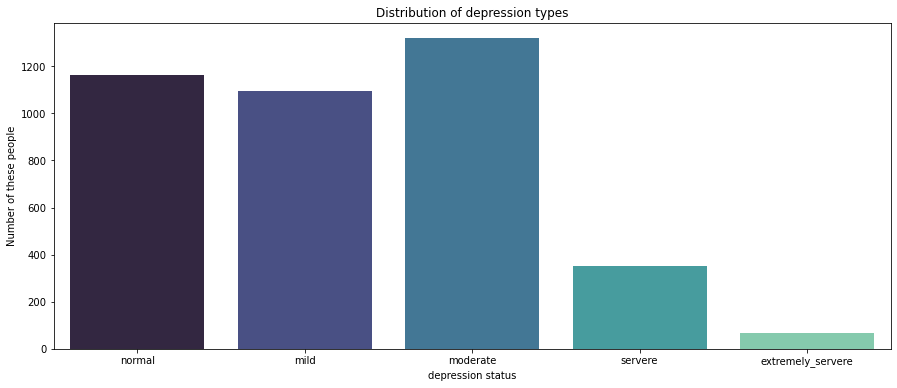

In [7]:
normal = depression_test["DEPRESSION SCORE"][(depression_test["DEPRESSION SCORE"] >= 0) & (depression_test["DEPRESSION SCORE"] <= 9)]
mild = depression_test["DEPRESSION SCORE"][(depression_test["DEPRESSION SCORE"] >= 10) & (depression_test["DEPRESSION SCORE"]<= 13)]
moderate =  depression_test["DEPRESSION SCORE"][(depression_test["DEPRESSION SCORE"]>= 14) & (depression_test["DEPRESSION SCORE"]<= 20)]
servere = depression_test["DEPRESSION SCORE"][(depression_test["DEPRESSION SCORE"] >= 21) & (depression_test["DEPRESSION SCORE"] <= 27)]
extremely_servere = depression_test["DEPRESSION SCORE"][(depression_test["DEPRESSION SCORE"] >= 28)]

aix  = ["normal","mild","moderate","servere","extremely_servere"]
aiy = [len(normal.values),len(mild.values),len(moderate.values),len(servere.values),len(extremely_servere.values)]
plt.figure(figsize=(15,6))
sbn.barplot(x=aix, y = aiy , palette = "mako")
plt.title("Distribution of depression types")
plt.xlabel("depression status")
plt.ylabel("Number of these people")
plt.show()

([<matplotlib.patches.Wedge at 0x1d5a7ebf8b0>,
 [Text(0.6707793708038399, 0.8718113532777633, 'normal'),
  Text(-0.9904759245643461, 0.47849497683717007, 'mild'),
  Text(-0.13529485549523124, -1.0916479753457726, 'moderate'),
  Text(1.0208345452732814, -0.4097521582331113, 'servere'),
  Text(1.098477376127698, -0.05785718741529033, 'extremely_servere')],
 [Text(0.36587965680209444, 0.47553346542423447, '29.12%'),
  Text(-0.540259595216916, 0.26099726009300184, '27.43%'),
  Text(-0.07379719390648976, -0.5954443501886032, '32.98%'),
  Text(0.5568188428763353, -0.2235011772180607, '8.80%'),
  Text(0.5991694778878353, -0.03155846586288563, '1.68%')])

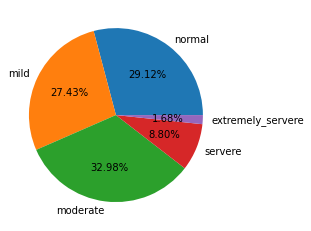

In [8]:
plt.pie(aiy,labels = aix,autopct='%1.2f%%')

In [9]:
Puan_depression = depression_test["DEPRESSION SCORE"]
Puan_depression = pd.DataFrame(Puan_depression)
scored = pd.concat([others,Puan_depression],axis = 1)
scored.tail(10)

,Age,Gender,DEPRESSION SCORE
3990,18,1,13.0
3991,18,1,14.0
3992,20,0,15.0
3993,22,0,15.0
3994,19,0,16.0
3995,22,1,10.0
3996,20,0,12.0
3997,22,0,9.0
3998,20,0,15.0
3999,21,0,13.0


In [10]:
conditions = [
    (scored['DEPRESSION SCORE'] >= 0 ) & (scored['DEPRESSION SCORE'] <= 10),
    (scored['DEPRESSION SCORE'] >= 10 ) & (scored['DEPRESSION SCORE'] <= 16),
    (scored['DEPRESSION SCORE'] >= 14 ) & (scored['DEPRESSION SCORE'] <= 20),
    (scored['DEPRESSION SCORE'] >= 21 ) & (scored['DEPRESSION SCORE'] <= 30),
    (scored['DEPRESSION SCORE'] >= 28 )]
    
values = ["normal","mild","moderate","servere","extremely_servere"]

scored['Depression Level'] = np.select(conditions, values)

scored.head(10)

,Age,Gender,DEPRESSION SCORE,Depression Level
0,24,1,5.0,normal
1,26,1,14.0,mild
2,22,1,18.0,moderate
3,24,0,21.0,servere
4,22,1,13.0,mild
5,18,1,10.0,normal
6,27,1,12.0,mild
7,22,1,11.0,mild
8,21,0,20.0,moderate
9,24,1,5.0,normal


In [19]:
anxiety_test = df.iloc[:,16:30 ]

anxiety_test["ANXIETY SCORE"] = anxiety_test.sum(axis = 1)
anxiety_test.tail(8)

,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,ANXIETY SCORE
3992,0,3,1,1,2,0,0,0,0,0,2,0,1,1,11
3993,2,0,3,0,2,0,1,0,2,0,1,2,2,0,15
3994,1,0,2,2,1,0,0,1,0,0,1,1,0,1,10
3995,2,2,0,1,2,1,0,0,2,0,1,2,0,1,14
3996,0,0,0,0,0,0,3,0,1,3,0,1,0,3,11
3997,1,0,0,0,0,1,0,0,1,0,0,0,1,1,5
3998,0,3,1,1,1,0,0,1,1,0,2,1,1,1,13
3999,0,0,0,0,0,0,1,1,0,2,1,1,1,1,8


In [18]:
depression_test = df.iloc[:,2:16]
depression_test["DEPRESSION SCORE"] = depression_test.sum(axis = 1)
depression_test.head(10)

# anxiety_test = df.iloc[:,2:16]
# anxiety_test["ANXIETY SCORE"] = anxiety_test.sum(axis = 1)
# anxiety_test.tail(8)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,DEPRESSION SCORE
0,1,1,1,1,1,0,0,0,0,0,0.0,0,0,0,5.0
1,1,0,0,1,1,2,2,1,1,0,1.0,1,2,2,14.0
2,1,2,3,1,0,2,0,1,1,0,3.0,2,2,1,18.0
3,1,1,2,1,2,1,0,1,1,1,3.0,2,3,3,21.0
4,1,2,0,2,1,0,0,1,2,0,1.0,1,1,2,13.0
5,1,0,1,0,1,1,0,1,1,1,1.0,1,1,1,10.0
6,1,2,1,0,0,0,2,1,2,0,1.0,2,0,1,12.0
7,1,1,0,0,0,1,0,1,1,0,1.0,3,1,2,11.0
8,3,1,1,0,2,3,0,0,1,0,3.0,2,1,3,20.0
9,0,0,1,0,0,1,1,1,0,0,0.0,1,1,0,5.0


In [18]:
normal = anxiety_test["ANXIETY SCORE"][(anxiety_test["ANXIETY SCORE"] >= 0) & (depression_test["DEPRESSION SCORE"] <= 7)]
mild = anxiety_test["ANXIETY SCORE"][(anxiety_test["ANXIETY SCORE"] >= 8) & (depression_test["DEPRESSION SCORE"]<= 9)]
moderate =  anxiety_test["ANXIETY SCORE"][(anxiety_test["ANXIETY SCORE"]>= 10) & (depression_test["DEPRESSION SCORE"]<= 14)]
servere = anxiety_test["ANXIETY SCORE"][(anxiety_test["ANXIETY SCORE"] >= 15) & (depression_test["DEPRESSION SCORE"] <= 19)]
extremely_servere = anxiety_test["ANXIETY SCORE"][(anxiety_test["ANXIETY SCORE"] >= 20)]


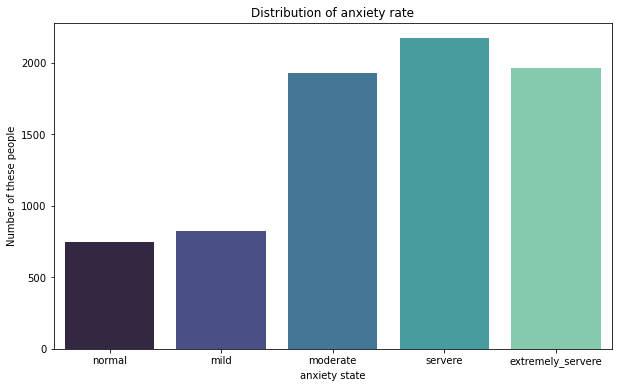

In [20]:
aix1  = ["normal","mild","moderate","servere", "extremely_servere"]
aiy2 = [len(normal.values),len(mild.values),len(moderate.values),len(servere.values),len(extremely_servere.values)]
plt.figure(figsize=(10,6))
sbn.barplot(x=aix1, y = aiy2 , palette = "mako")
plt.title("Distribution of anxiety rate")
plt.xlabel("anxiety state")
plt.ylabel("Number of these people")
plt.show()

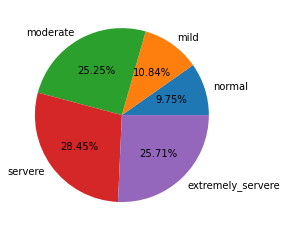

In [21]:
plt.pie(aiy2,labels = aix1,autopct='%1.2f%%')
plt.show()

In [23]:
Puan_anxiety = anxiety_test["ANXIETY SCORE"]
Puan_anxiety = pd.DataFrame(Puan_anxiety)
frame = pd.concat([scored,Puan_anxiety],axis = 1)
frame.head(10)

,Age,Gender,DEPRESSION SCORE,Depression Level,ANXIETY SCORE
0,24,1,5.0,normal,0
1,26,1,14.0,mild,22
2,22,1,18.0,moderate,6
3,24,0,21.0,servere,21
4,22,1,13.0,mild,28
5,18,1,10.0,normal,4
6,27,1,12.0,mild,10
7,22,1,11.0,mild,9
8,21,0,20.0,moderate,20
9,24,1,5.0,normal,22


In [24]:
conditions1 = [
    (frame['ANXIETY SCORE'] >= 0 ) & (frame['ANXIETY SCORE'] <= 7),
    (frame['ANXIETY SCORE'] >=8 ) & (frame['ANXIETY SCORE'] <= 9),
    (frame['ANXIETY SCORE'] >= 10 ) & (frame['ANXIETY SCORE'] <= 14),
    (frame['ANXIETY SCORE'] >= 15 ) & (frame['ANXIETY SCORE'] <= 19),
    (frame['ANXIETY SCORE'] >= 20 )]
    
aix1  = ["normal","mild","moderate","servere", "extremely_servere"]


frame['Anxiety Level'] = np.select(conditions1, aix1)


frame.head(29)

,Age,Gender,DEPRESSION SCORE,Depression Level,ANXIETY SCORE,Anxiety Level
0,24,1,5.0,normal,0,normal
1,26,1,14.0,mild,22,extremely_servere
2,22,1,18.0,moderate,6,normal
3,24,0,21.0,servere,21,extremely_servere
4,22,1,13.0,mild,28,extremely_servere
5,18,1,10.0,normal,4,normal
6,27,1,12.0,mild,10,moderate
7,22,1,11.0,mild,9,mild
8,21,0,20.0,moderate,20,extremely_servere
9,24,1,5.0,normal,22,extremely_servere


In [25]:
frame.describe()

,Age,Gender,DEPRESSION SCORE,ANXIETY SCORE
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,21.139500,0.460750,12.983250,19.135000
std,3.079677,0.498519,5.936184,8.995166
min,15.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,9.000000,12.000000
50%,21.000000,0.000000,13.000000,19.000000
75%,22.000000,1.000000,17.000000,25.000000
max,45.000000,1.000000,39.000000,59.000000


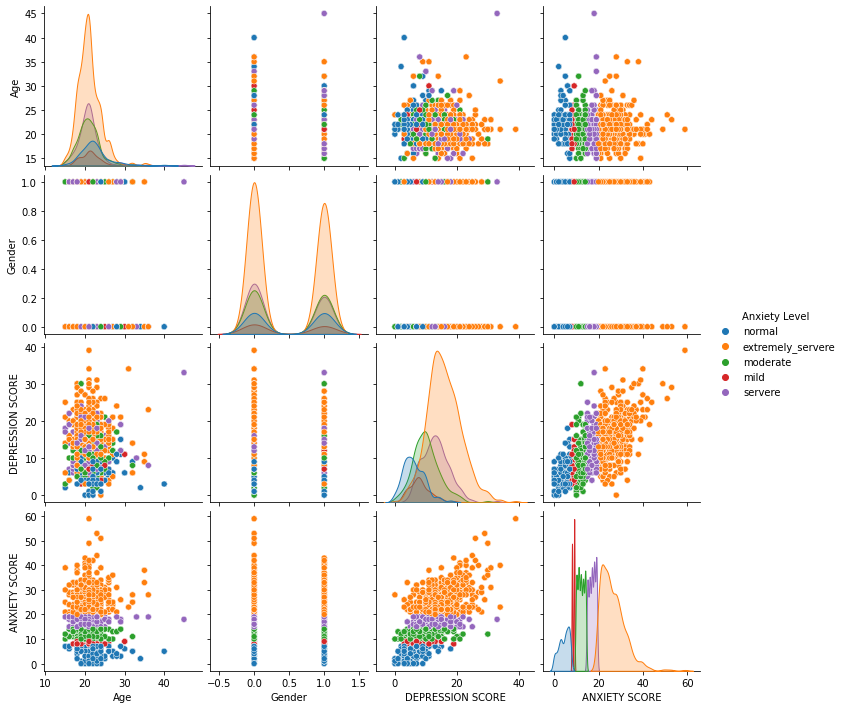

In [26]:
sbn.pairplot(frame, hue = "Anxiety Level")

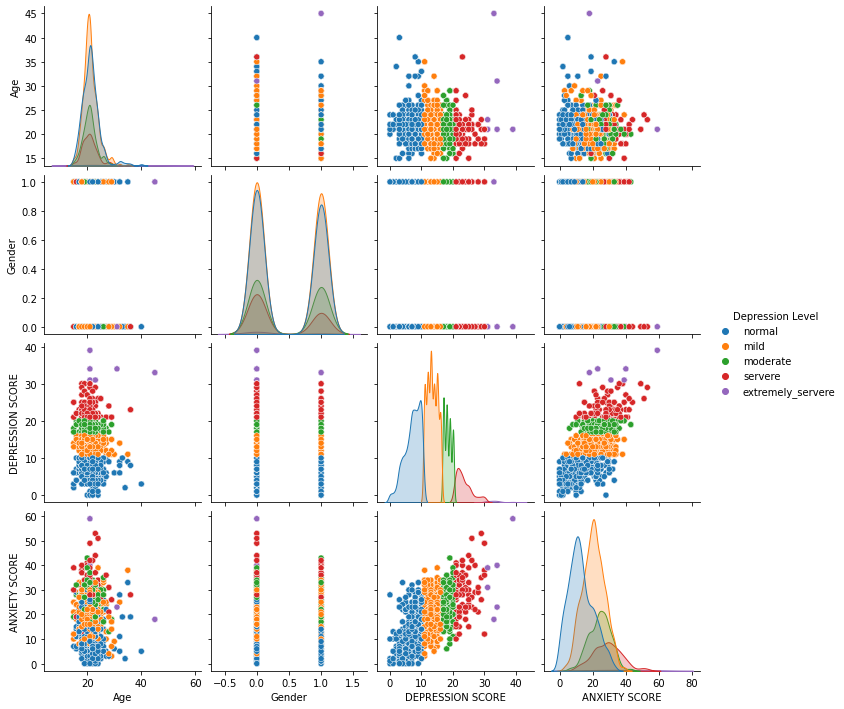

In [27]:
sbn.pairplot(frame, hue = "Depression Level")

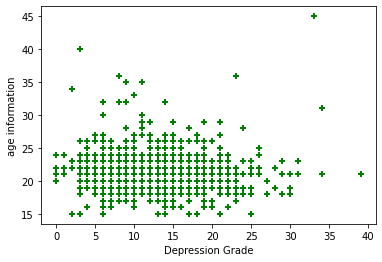

In [28]:
plt.scatter(frame['DEPRESSION SCORE'] , frame['Age'], color = 'green' , marker = '+')

plt.xlabel("Depression Grade")
plt.ylabel("age information")

plt.show()

Text(0, 0.5, 'Age information')

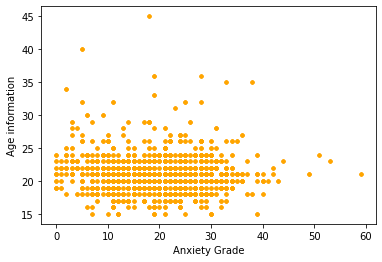

In [32]:
plt.scatter(frame['ANXIETY SCORE'] , frame['Age'], color = 'orange' , marker = '.')
plt.xlabel("Anxiety Grade")
plt.ylabel("Age information")

Text(0, 0.5, 'Gender')

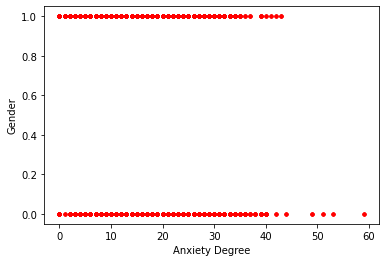

In [33]:
plt.scatter(frame['ANXIETY SCORE'] , frame['Gender'], color = 'red' , marker = '.')
plt.xlabel("Anxiety Degree")
plt.ylabel("Gender")

Text(0, 0.5, 'Gender')

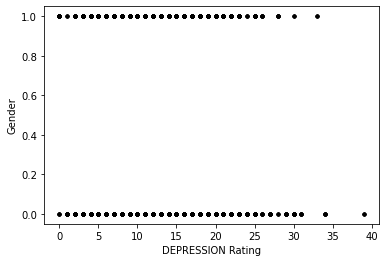

In [34]:
plt.scatter(frame['DEPRESSION SCORE'] , frame['Gender'], color = 'black' , marker = '.')
plt.xlabel("DEPRESSION Rating")
plt.ylabel("Gender")

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
frame["Gender"] = le.fit_transform(frame["Gender"])
frame["Depression Level"] = le.fit_transform(frame["Depression Level"])
frame["Anxiety Level"] = le.fit_transform(frame["Anxiety Level"])

my_data_dep = frame.drop(["Anxiety Level","ANXIETY SCORE"],axis = 1)
my_data_anx = frame.drop(["Depression Level","DEPRESSION SCORE"],axis = 1)
my_data_dep.head(7)

frame


,Age,Gender,DEPRESSION SCORE,Depression Level,ANXIETY SCORE,Anxiety Level
0,24,1,5.0,3,0,3
1,26,1,14.0,1,22,0
2,22,1,18.0,2,6,3
3,24,0,21.0,4,21,0
4,22,1,13.0,1,28,0
...,...,...,...,...,...,...
3995,22,1,10.0,3,14,2
3996,20,0,12.0,1,16,4
3997,22,0,9.0,3,6,3
3998,20,0,15.0,1,22,0


In [36]:
my_data_anx.head(7)

,Age,Gender,ANXIETY SCORE,Anxiety Level
0,24,1,0,3
1,26,1,22,0
2,22,1,6,3
3,24,0,21,0
4,22,1,28,0
5,18,1,4,3
6,27,1,10,2


In [37]:
from sklearn import preprocessing
from sklearn.preprocessing  import LabelEncoder,OneHotEncoder

label_encoder  = preprocessing.LabelEncoder()
onehotencoder  = OneHotEncoder()
                                                        
frame.head()

,Age,Gender,DEPRESSION SCORE,Depression Level,ANXIETY SCORE,Anxiety Level
0,24,1,5.0,3,0,3
1,26,1,14.0,1,22,0
2,22,1,18.0,2,6,3
3,24,0,21.0,4,21,0
4,22,1,13.0,1,28,0


In [38]:
my_data_dep

,Age,Gender,DEPRESSION SCORE,Depression Level
0,24,1,5.0,3
1,26,1,14.0,1
2,22,1,18.0,2
3,24,0,21.0,4
4,22,1,13.0,1
...,...,...,...,...
3995,22,1,10.0,3
3996,20,0,12.0,1
3997,22,0,9.0,3
3998,20,0,15.0,1


In [39]:
X = my_data_dep.drop(["Depression Level"],axis = 1)   
X = X.values
y = my_data_dep["Depression Level"]  

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25
                                                 , random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test) 
X_test

array([[ 2.66145649, -0.92605893, -0.33061575],
       [ 0.97954516,  1.07984489,  0.17099277],
       [-1.3751307 , -0.92605893,  0.17099277],
       ...,
       [-2.04789523, -0.92605893,  0.83980413],
       [ 0.64316289, -0.92605893, -0.33061575],
       [ 1.98869196,  1.07984489,  1.34141265]])

In [44]:
x_train.shape

(3000, 3)

In [45]:
x_test.shape

(1000, 3)

In [35]:
x_train

array([[18.,  0., 15.],
       [20.,  1.,  0.],
       [23.,  1., 22.],
       ...,
       [16.,  0.,  4.],
       [23.,  1.,  7.],
       [18.,  1., 10.]])

In [46]:
print("Male", df['Gender'].value_counts()[1])
print("Female", df['Gender'].value_counts()[0])
count_male=df['Gender']==1
count_male.sum()

Male 1843
Female 2157


1843

In [47]:
df['Gender'].value_counts()

0    2157
1    1843
Name: Gender, dtype: int64

In [48]:
df.Gender.value_counts(normalize=True)

0    0.53925
1    0.46075
Name: Gender, dtype: float64

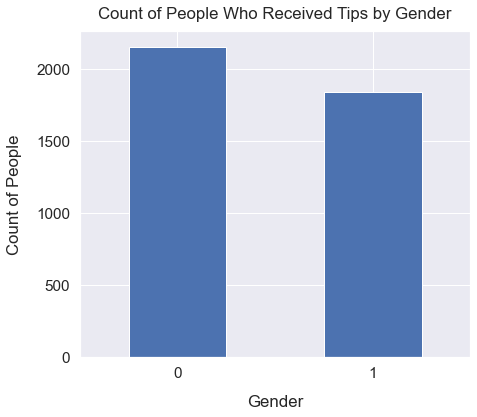

In [49]:
import seaborn as sns
sns.set(font_scale=1.4)
df['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Received Tips by Gender", y=1.02);

Text(0.5, 1.0, 'Age distr among males')

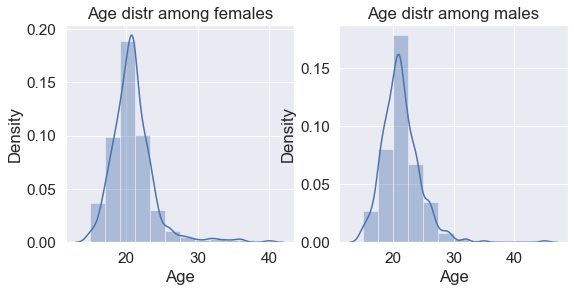

In [50]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,4))

female = df[df.Gender == 0]
male = df[df.Gender == 1]

sns.distplot(female.Age, bins=12 ,ax=ax1)
sns.distplot(male.Age, bins=12, ax=ax2)

ax1.set_title('Age distr among females')
ax2.set_title('Age distr among males')

Text(0.5, 1.0, 'All Time Medals of top 10 countries')

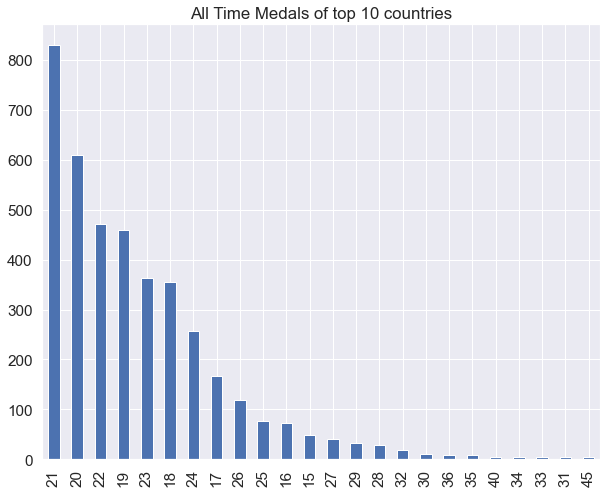

In [51]:
top_10 = df['Age'].value_counts()
top_10.plot(kind='bar',figsize=(10,8))
plt.title('All Time Medals of top 10 countries')

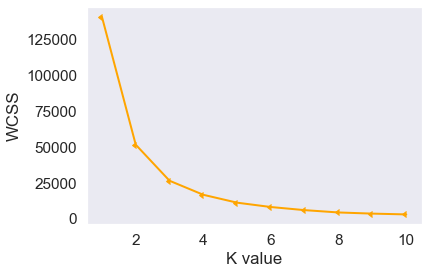

In [52]:
k_depression =my_data_dep.loc[:, ["DEPRESSION SCORE"]].values


from sklearn.cluster import KMeans
list  =  []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(k_depression)
    list.append(kmeans.inertia_)
plt.figure()
plt.grid()
plt.plot(range(1,11),list, linewidth = 2, color = "orange" , marker = 8 )
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

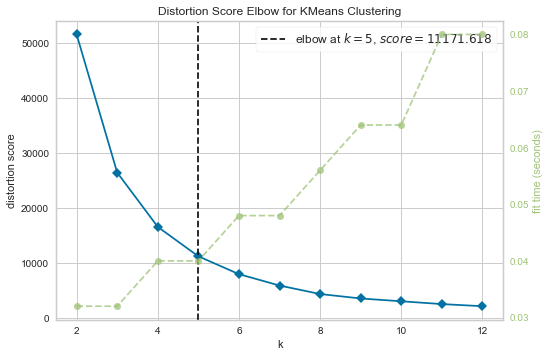

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,13))
visu.fit(k_depression)
visu.poof()

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid = {'n_neighbors': np.arange(13,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=4)
knn_cv.fit(X,y)
knn_cv.best_score_

0.99325

In [55]:
knn_cv.best_params_

{'n_neighbors': 13}

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
knn = KNeighborsClassifier(n_neighbors=7,metric="minkowski")   #euclidean ve manhattan  
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)

0.976

In [57]:
y_pred

array([1, 1, 1, 3, 3, 3, 1, 3, 3, 2, 1, 4, 2, 3, 4, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 4, 1, 1, 1, 1, 4, 1, 3, 3, 1, 1, 3,
       1, 3, 3, 3, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 3, 4,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 3, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3,
       3, 1, 2, 4, 1, 3, 1, 1, 1, 4, 3, 3, 3, 3, 2, 1, 4, 1, 4, 1, 2, 2,
       2, 3, 1, 1, 2, 1, 2, 2, 1, 1, 2, 4, 3, 3, 3, 1, 2, 1, 3, 3, 1, 1,
       1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 0, 1,
       3, 1, 4, 3, 4, 3, 1, 3, 2, 3, 3, 3, 2, 4, 2, 2, 3, 1, 1, 1, 4, 3,
       1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 2, 2, 1, 2, 4,
       1, 3, 2, 1, 3, 1, 3, 3, 3, 1, 4, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1,
       3, 1, 1, 3, 2, 1, 3, 3, 1, 2, 3, 1, 1, 2, 3, 3, 4, 4, 2, 3, 1, 1,
       1, 1, 4, 1, 2, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 4, 2,
       3, 1, 2, 2, 4, 4, 1, 4, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 2, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 1, 3,

In [58]:
y_test

555     1
3491    1
527     1
3925    3
2989    3
       ..
2778    1
790     1
1334    2
678     1
3453    4
Name: Depression Level, Length: 1000, dtype: int32

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
cm_knn

array([[  3,   0,   0,   0,   3],
       [  0, 395,   8,   5,   0],
       [  0,   3, 161,   0,   0],
       [  0,   1,   0, 334,   0],
       [  0,   2,   2,   0,  83]], dtype=int64)

Text(43.0, 0.5, 'Truth')

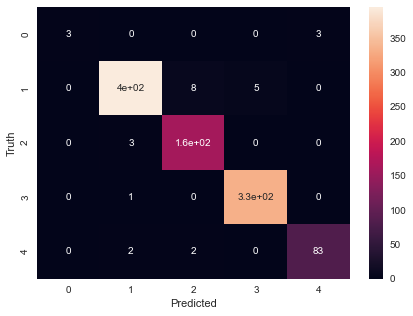

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sbn.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.99      0.97      0.98       408
           2       0.94      0.98      0.96       164
           3       0.99      1.00      0.99       335
           4       0.97      0.95      0.96        87

    accuracy                           0.98      1000
   macro avg       0.98      0.88      0.91      1000
weighted avg       0.98      0.98      0.98      1000



In [62]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train,y_train.ravel())
predict_log = log_reg.predict(X_test)
predict_log

array([1, 1, 1, 3, 3, 3, 1, 3, 3, 2, 1, 4, 2, 3, 4, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 4, 1, 1, 1, 1, 4, 1, 3, 3, 1, 1, 3,
       1, 3, 3, 3, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 3, 4,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 3, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3,
       3, 1, 2, 4, 1, 3, 1, 1, 1, 4, 3, 3, 3, 3, 2, 1, 4, 1, 4, 1, 2, 2,
       2, 3, 1, 1, 2, 1, 2, 2, 1, 1, 2, 4, 3, 3, 3, 1, 2, 1, 3, 3, 1, 1,
       1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 0, 3,
       3, 1, 4, 3, 4, 3, 1, 3, 2, 3, 3, 3, 2, 4, 2, 2, 3, 1, 1, 1, 4, 3,
       1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 2, 1, 2, 4,
       1, 3, 2, 1, 3, 1, 3, 3, 3, 1, 4, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1,
       3, 1, 1, 3, 2, 1, 3, 3, 1, 2, 3, 1, 1, 2, 3, 3, 4, 4, 1, 3, 1, 1,
       1, 1, 4, 1, 2, 1, 1, 3, 2, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 4, 2,
       3, 1, 2, 2, 4, 4, 1, 4, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 2, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 1, 1,

In [63]:
from sklearn.metrics import confusion_matrix
cm_linear = confusion_matrix(y_test,predict_log)
cm_linear

array([[  4,   0,   0,   0,   2],
       [  0, 408,   0,   0,   0],
       [  0,   0, 164,   0,   0],
       [  0,   0,   0, 335,   0],
       [  0,   0,   0,   0,  87]], dtype=int64)

In [64]:
accuracy_score(y_test,predict_log)

0.998

Text(43.0, 0.5, 'Truth')

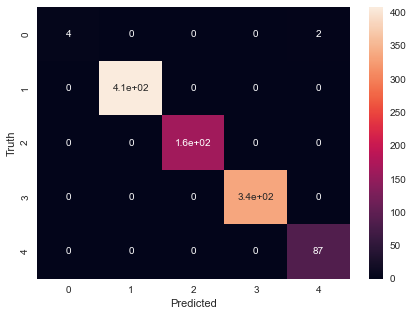

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sbn.heatmap(cm_linear, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_log))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       335
           4       0.98      1.00      0.99        87

    accuracy                           1.00      1000
   macro avg       1.00      0.93      0.96      1000
weighted avg       1.00      1.00      1.00      1000



In [68]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
model.score(X_test, y_test) 

0.998

In [69]:
from sklearn.metrics import confusion_matrix
y_pred_svm = model.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[  4,   0,   0,   0,   2],
       [  0, 408,   0,   0,   0],
       [  0,   0, 164,   0,   0],
       [  0,   0,   0, 335,   0],
       [  0,   0,   0,   0,  87]], dtype=int64)

In [70]:
accuracy_score(y_test,y_pred_svm)

0.998

Text(61.0, 0.5, 'Truth')

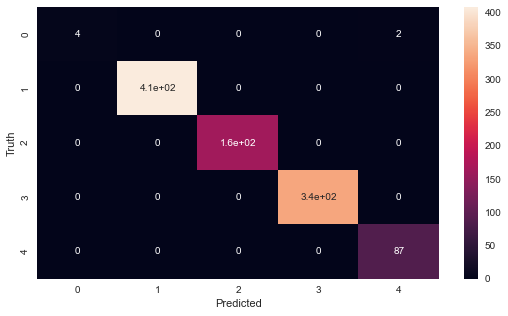

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(9,5))
sbn.heatmap(cm_svm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       335
           4       0.98      1.00      0.99        87

    accuracy                           1.00      1000
   macro avg       1.00      0.93      0.96      1000
weighted avg       1.00      1.00      1.00      1000



In [73]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [74]:
y_pred_gini = clf_gini.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9940


In [76]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 3, 4, ..., 3, 3, 3])

In [77]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9940
Test set score: 0.9940


[Text(0.3333333333333333, 0.875, 'X[2] <= -0.414\ngini = 0.694\nsamples = 3000\nvalue = [18, 1111, 462, 1101, 308]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 1101\nvalue = [0, 0, 0, 1101, 0]'),
 Text(0.5, 0.625, 'X[2] <= 0.589\ngini = 0.572\nsamples = 1899\nvalue = [18, 1111, 462, 0, 308]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1111\nvalue = [0, 1111, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'X[2] <= 1.258\ngini = 0.503\nsamples = 788\nvalue = [18, 0, 462, 0, 308]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 462\nvalue = [0, 0, 462, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.104\nsamples = 326\nvalue = [18, 0, 0, 0, 308]')]

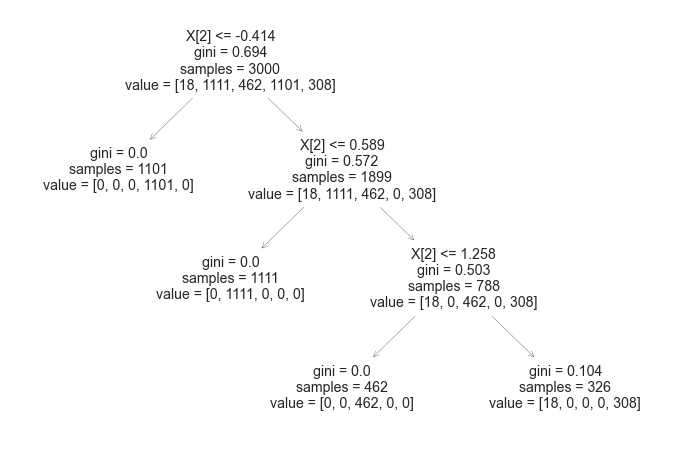

In [78]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [79]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=85)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=85)

In [80]:
y_pred_en = clf_en.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9940


In [82]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 3, 4, ..., 3, 3, 3])

In [83]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9940


[Text(0.3333333333333333, 0.875, 'X[2] <= -0.414\nentropy = 1.859\nsamples = 3000\nvalue = [18, 1111, 462, 1101, 308]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 1101\nvalue = [0, 0, 0, 1101, 0]'),
 Text(0.5, 0.625, 'X[2] <= 0.589\nentropy = 1.438\nsamples = 1899\nvalue = [18, 1111, 462, 0, 308]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 1111\nvalue = [0, 1111, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'X[2] <= 1.258\nentropy = 1.106\nsamples = 788\nvalue = [18, 0, 462, 0, 308]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 462\nvalue = [0, 0, 462, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.308\nsamples = 326\nvalue = [18, 0, 0, 0, 308]')]

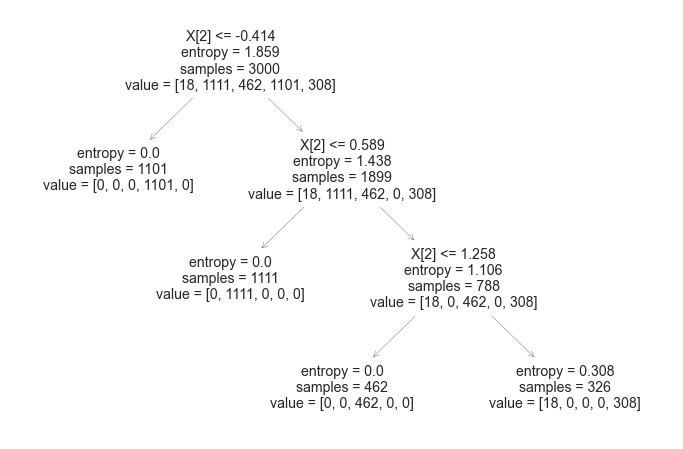

In [84]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   0   0   0   6]
 [  0 408   0   0   0]
 [  0   0 164   0   0]
 [  0   0   0 335   0]
 [  0   0   0   0  87]]


In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       335
           4       0.94      1.00      0.97        87

    accuracy                           0.99      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.99      0.99      0.99      1000



In [87]:
#ANXIETY DETECTION 




In [88]:
X1 = my_data_anx.drop(["Anxiety Level"],axis = 1 ) 
y1 = my_data_anx["Anxiety Level"]

In [89]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.25, random_state = 85)

from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()



X_train1 = sc1.fit_transform(x_train1)
X_test1 = sc1.transform(x_test1) 
X_test1

array([[ 2.23888696,  1.07551001,  0.21915396],
       [ 0.28759827,  1.07551001,  0.89014755],
       [-1.33847564, -0.92979144,  0.89014755],
       ...,
       [-0.68804607, -0.92979144, -0.45183963],
       [ 1.5884574 ,  1.07551001,  0.77831529],
       [ 1.5884574 , -0.92979144, -0.56367189]])

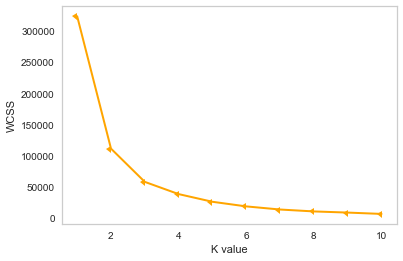

In [90]:
k_anxiety = my_data_anx.loc[:, ["ANXIETY SCORE"]].values


from sklearn.cluster import KMeans
list  =  []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(k_anxiety)
    list.append(kmeans.inertia_)
plt.figure()
plt.grid()
plt.plot(range(1,11),list, linewidth = 2, color = "orange" , marker = 8 )
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

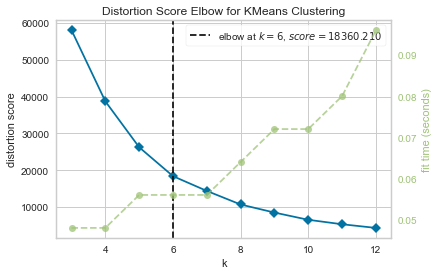

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (3,13))
visu.fit(k_anxiety)
visu.poof()

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
knn = KNeighborsClassifier(n_neighbors=7,metric="minkowski")   
knn.fit(X_train1,y_train1)
y_pred1 = knn.predict(X_test1)
y_pred1
accuracy_score(y_test1,y_pred1)

0.974

In [93]:
y_pred1

array([0, 0, 0, 3, 0, 2, 4, 0, 3, 0, 0, 0, 4, 0, 1, 2, 0, 2, 4, 0, 3, 2,
       4, 2, 4, 4, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 2, 1, 0, 2, 2, 0,
       0, 3, 3, 0, 4, 0, 3, 4, 0, 2, 3, 0, 4, 0, 4, 0, 4, 0, 0, 2, 0, 4,
       0, 0, 0, 0, 3, 0, 3, 0, 4, 4, 0, 2, 4, 0, 0, 2, 0, 4, 2, 1, 4, 0,
       0, 0, 2, 0, 0, 0, 0, 4, 2, 3, 1, 4, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       3, 4, 4, 3, 0, 0, 2, 1, 2, 0, 2, 2, 2, 4, 0, 0, 0, 1, 0, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 4, 4, 3, 0, 0,
       2, 0, 4, 3, 3, 3, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 4, 4, 1, 0, 0, 2,
       1, 0, 4, 4, 0, 0, 1, 4, 4, 0, 4, 0, 0, 0, 0, 2, 0, 0, 1, 0, 4, 0,
       4, 0, 4, 4, 0, 4, 0, 0, 0, 2, 0, 2, 3, 4, 0, 0, 0, 3, 4, 0, 0, 0,
       2, 0, 0, 4, 2, 0, 0, 1, 4, 0, 0, 0, 4, 4, 4, 0, 0, 3, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 3, 4, 3, 3, 3, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 4, 0, 4, 2, 0, 3, 0, 0,
       0, 4, 1, 0, 0, 4, 4, 4, 0, 0, 0, 4, 1, 0, 0,

In [94]:
y_test1

2061    0
1666    0
1805    0
2397    3
3114    0
       ..
1173    2
1326    4
278     4
1103    0
1060    2
Name: Anxiety Level, Length: 1000, dtype: int32

In [95]:
from sklearn.metrics import confusion_matrix
y_pred_knn_1 = knn.predict(X_test1)
cm1_knn = confusion_matrix(y_test1, y_pred_knn_1)
cm1_knn

array([[500,   0,   0,   0,   3],
       [  0,  45,   0,   2,   0],
       [  0,   2, 150,   0,   6],
       [  0,   1,   0, 100,   0],
       [  9,   0,   2,   1, 179]], dtype=int64)

Text(43.0, 0.5, 'Truth')

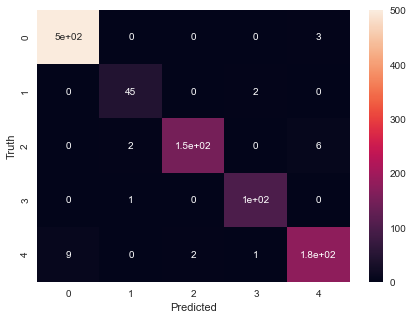

In [96]:
%matplotlib inline
plt.figure(figsize=(7,5))
sbn.heatmap(cm1_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred_knn_1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       503
           1       0.94      0.96      0.95        47
           2       0.99      0.95      0.97       158
           3       0.97      0.99      0.98       101
           4       0.95      0.94      0.94       191

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [98]:
from sklearn.linear_model import LogisticRegression
log_reg_1 = LogisticRegression(random_state = 85)
log_reg_1.fit(X_train1,y_train1.ravel())
predict_log_1 = log_reg.predict(X_test1)
predict_log_1

array([1, 2, 2, 3, 2, 3, 1, 2, 3, 1, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 3, 3,
       1, 3, 1, 1, 3, 1, 2, 2, 2, 1, 1, 3, 4, 4, 4, 1, 3, 3, 1, 3, 3, 4,
       1, 3, 3, 1, 1, 4, 3, 1, 4, 3, 3, 4, 1, 1, 1, 2, 1, 4, 1, 3, 1, 1,
       2, 1, 2, 1, 3, 1, 3, 4, 1, 1, 4, 3, 1, 2, 1, 3, 4, 1, 3, 3, 1, 4,
       4, 1, 3, 2, 4, 1, 1, 3, 3, 3, 3, 1, 3, 4, 4, 2, 3, 4, 1, 2, 1, 1,
       3, 1, 2, 3, 1, 1, 3, 3, 3, 4, 3, 3, 3, 1, 4, 1, 4, 3, 1, 3, 1, 1,
       4, 2, 1, 1, 1, 1, 4, 3, 4, 2, 3, 1, 2, 4, 2, 3, 1, 3, 1, 3, 2, 1,
       3, 1, 1, 3, 3, 3, 4, 1, 1, 3, 1, 3, 1, 2, 3, 1, 1, 1, 3, 1, 1, 3,
       3, 2, 1, 1, 1, 1, 3, 1, 1, 0, 1, 2, 4, 4, 2, 3, 4, 4, 3, 2, 1, 2,
       3, 2, 1, 1, 1, 3, 1, 2, 2, 3, 1, 3, 3, 1, 4, 1, 2, 3, 1, 1, 1, 1,
       3, 1, 4, 3, 3, 0, 2, 3, 1, 1, 1, 4, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 2, 3, 2, 2, 4, 1, 1, 1, 1, 1, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3,
       1, 2, 4, 1, 1, 4, 2, 2, 3, 1, 2, 1, 1, 3, 1, 2, 3, 3, 4, 3, 4, 1,
       1, 1, 3, 2, 2, 3, 1, 1, 1, 1, 2, 1, 3, 4, 1,

In [99]:
from sklearn.metrics import confusion_matrix
y_pred_linear_1 = knn.predict(X_test1)
cm1_linear = confusion_matrix(y_test1,y_pred_linear_1)
cm1_linear

array([[500,   0,   0,   0,   3],
       [  0,  45,   0,   2,   0],
       [  0,   2, 150,   0,   6],
       [  0,   1,   0, 100,   0],
       [  9,   0,   2,   1, 179]], dtype=int64)

In [100]:
accuracy_score(y_test1,y_pred_linear_1)

0.974

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred_linear_1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       503
           1       0.94      0.96      0.95        47
           2       0.99      0.95      0.97       158
           3       0.97      0.99      0.98       101
           4       0.95      0.94      0.94       191

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [102]:
from  sklearn.svm import SVC
model1 = SVC(kernel = 'linear')
model1.fit(X_train1, y_train1)
model1.score(X_test1, y_test1)     

0.998

In [103]:
from sklearn.metrics import confusion_matrix
y_pred_svm_1 = model1.predict(X_test1)
cm_svm_1= confusion_matrix(y_test1, y_pred_svm_1)
cm_svm_1

array([[503,   0,   0,   0,   0],
       [  0,  45,   2,   0,   0],
       [  0,   0, 158,   0,   0],
       [  0,   0,   0, 101,   0],
       [  0,   0,   0,   0, 191]], dtype=int64)

In [104]:
accuracy_score(y_test1,y_pred_svm_1)

0.998

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred_svm_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       1.00      0.96      0.98        47
           2       0.99      1.00      0.99       158
           3       1.00      1.00      1.00       101
           4       1.00      1.00      1.00       191

    accuracy                           1.00      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000



In [106]:
# Decision tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=85)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=85)

In [108]:
y_pred_gini = clf_gini.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


In [110]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 3, 4, ..., 3, 3, 3])

In [111]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


In [112]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.2857142857142857, 0.9, 'X[2] <= -0.414\ngini = 0.694\nsamples = 3000\nvalue = [18, 1111, 462, 1101, 308]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 1101\nvalue = [0, 0, 0, 1101, 0]'),
 Text(0.42857142857142855, 0.7, 'X[2] <= 0.589\ngini = 0.572\nsamples = 1899\nvalue = [18, 1111, 462, 0, 308]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 1111\nvalue = [0, 1111, 0, 0, 0]'),
 Text(0.5714285714285714, 0.5, 'X[2] <= 1.258\ngini = 0.503\nsamples = 788\nvalue = [18, 0, 462, 0, 308]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 462\nvalue = [0, 0, 462, 0, 0]'),
 Text(0.7142857142857143, 0.3, 'X[2] <= 2.93\ngini = 0.104\nsamples = 326\nvalue = [18, 0, 0, 0, 308]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 308\nvalue = [0, 0, 0, 0, 308]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]')]

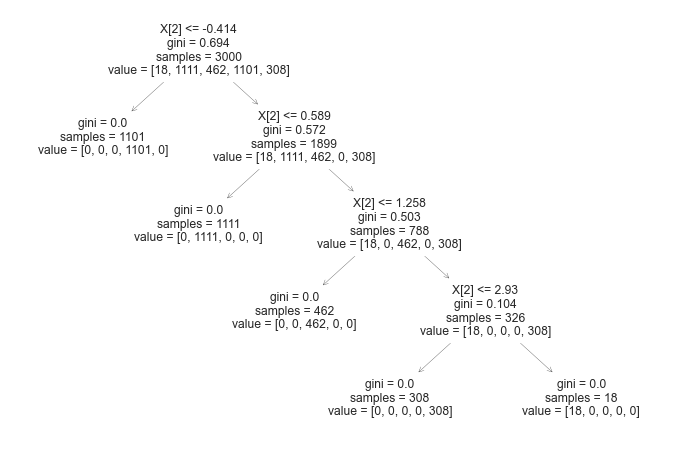

In [113]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [114]:
# Entrop
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=85)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=85)

In [115]:
y_pred_en = clf_en.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9940


In [117]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9940


[Text(0.3333333333333333, 0.875, 'X[2] <= -0.414\nentropy = 1.859\nsamples = 3000\nvalue = [18, 1111, 462, 1101, 308]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 1101\nvalue = [0, 0, 0, 1101, 0]'),
 Text(0.5, 0.625, 'X[2] <= 0.589\nentropy = 1.438\nsamples = 1899\nvalue = [18, 1111, 462, 0, 308]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 1111\nvalue = [0, 1111, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'X[2] <= 1.258\nentropy = 1.106\nsamples = 788\nvalue = [18, 0, 462, 0, 308]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 462\nvalue = [0, 0, 462, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.308\nsamples = 326\nvalue = [18, 0, 0, 0, 308]')]

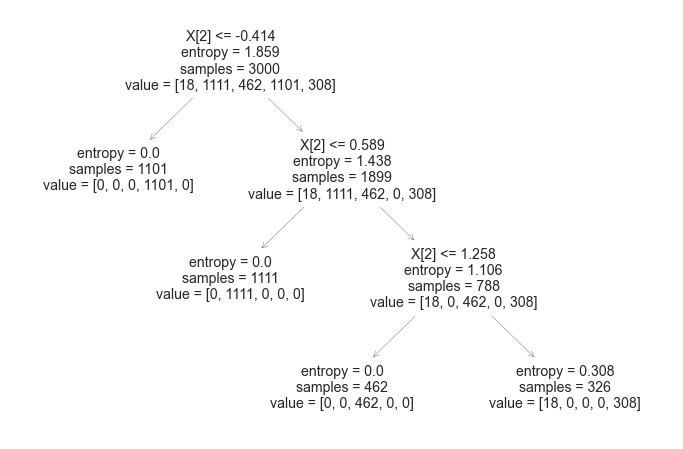

In [118]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [119]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   0   0   0   6]
 [  0 408   0   0   0]
 [  0   0 164   0   0]
 [  0   0   0 335   0]
 [  0   0   0   0  87]]


In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       335
           4       0.94      1.00      0.97        87

    accuracy                           0.99      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.99      0.99      0.99      1000

